In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
# Topic: K-Means, KNN, Decision Tree (any Topic will be given to anyone, with an dataset)

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/Ataullha/Demo-Dataset/refs/heads/main/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


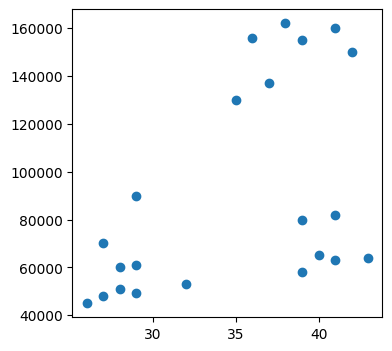

In [115]:
plt.figure(figsize=(4, 4))
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [116]:
df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df['Income($)'] = (df['Income($)'] - df['Income($)'].min()) / (df['Income($)'].max() - df['Income($)'].min()) 
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [117]:
from sklearn.cluster import KMeans

In [118]:
# SSE => sum square error

sse = []

for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
# sse

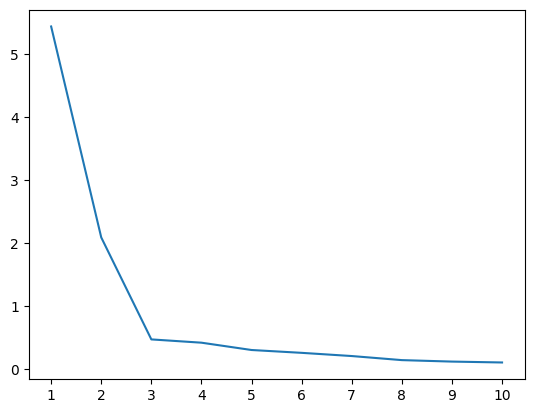

In [119]:
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.show()

In [120]:
km = KMeans(n_clusters=3, random_state=42)
predicted_cluster = km.fit_predict(df[['Age', 'Income($)']])
print(predicted_cluster)

[1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2]


In [121]:
df['Cluster'] = predicted_cluster
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [122]:
cluster0 = df[df['Cluster']==0]
cluster1 = df[df['Cluster']==1]
cluster2 = df[df['Cluster']==2]
cluster2.tail(2)

,Name,Age,Income($),Cluster
20,Sid,0.882353,0.316239,2
21,Abdul,0.764706,0.111111,2


In [123]:
centroids = km.cluster_centers_

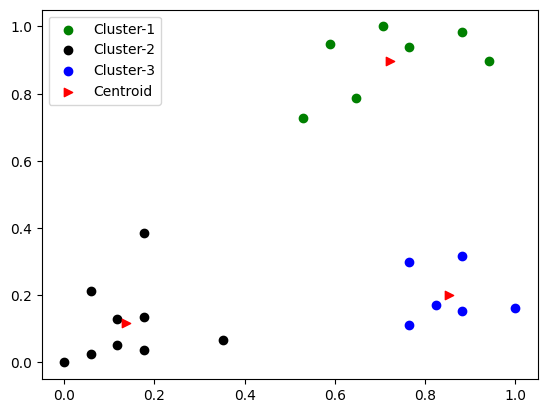

In [124]:
plt.scatter(cluster0["Age"], cluster0["Income($)"], color="green", label='Cluster-1')
plt.scatter(cluster1["Age"], cluster1["Income($)"], color="black", label='Cluster-2')
plt.scatter(cluster2["Age"], cluster2["Income($)"], color="blue", label='Cluster-3')
plt.scatter(centroids[:, 0], centroids[:, 1], color="red", marker=">", label='Centroid')
plt.legend()
plt.show()